In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import sys
import os
import pandas as pd
%load_ext autoreload
%autoreload 2

sys.path.append('..')
from dataset.create_google_fonts_dataset import parse_google_fonts_metadata
from dataset.utils import visualize_set_of_chars, render_character

3


error: OpenCV(4.2.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/resize.cpp:3923: error: (-215:Assertion failed) func != 0 in function 'resize'


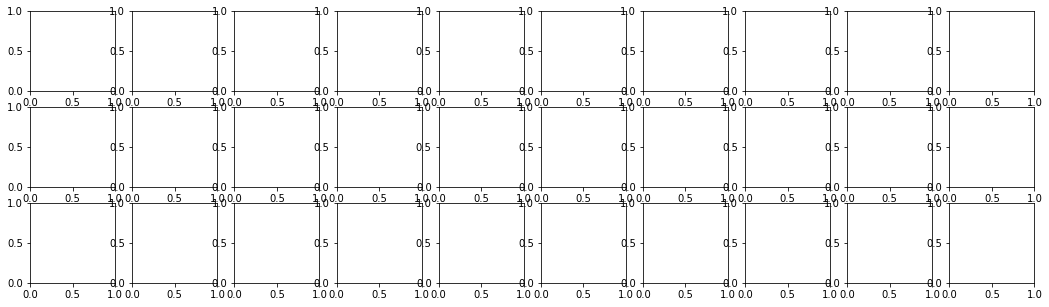

In [2]:
# parse Google Font repo
google_fonts_path = '../dataset/fonts/ofl/'
gf_metadata = parse_google_fonts_metadata(google_fonts_path)

# render some random fonts
for font_path in np.random.choice(gf_metadata[gf_metadata.category=='SERIF'].path, 10):
    visualize_set_of_chars(font_path, 'ABCDEFGHIJKLMNOPQRSTUVWXYZ', 64)

In [51]:
for i, row in gf_metadata.iterrows():
    conditions = ('latin' in row.subsets) and (row.style is 'normal')
    if :
        print(row.subsets)
        print(row.style)

['khmer', 'menu']
normal
['bengali']
normal
['khmer', 'menu']
normal
['khmer', 'menu']
normal
['korean', 'menu']
normal
['menu', 'khmer']
normal
['menu', 'khmer']
normal
['menu', 'khmer']
normal
['korean', 'menu']
normal
['menu', 'lao']
normal
['menu', 'lao']
normal
['menu', 'khmer']
normal
['menu', 'khmer']
normal
['menu', 'khmer']
normal
['menu', 'korean']
normal
['menu', 'korean']
normal
['korean', 'menu']
normal
['menu', 'khmer']
normal
['menu', 'khmer']
normal
['menu']
normal
['korean', 'menu']
normal
['korean', 'menu']
normal
['khmer', 'menu']
normal
['menu', 'khmer']
normal
['menu', 'khmer']
normal
['khmer', 'menu']
normal
['khmer', 'menu']
normal
['khmer', 'menu']
normal
['korean', 'menu']
normal
['korean', 'menu']
normal
['korean', 'menu']
normal
['menu', 'khmer']
normal
['menu', 'korean']
normal
['menu', 'khmer']
normal
['menu', 'khmer']
normal
['menu', 'khmer']
normal
['khmer', 'menu']
normal
['menu', 'khmer']
normal
['menu', 'khmer']
normal
['tamil']
normal
['tamil']
normal

# Explore Google Fonts set

In [52]:
unique_categories = gf_metadata.category.unique()
print('Presented Font categories:')
print(unique_categories,'\n')
print('Total number of fonts')
print(len(gf_metadata),'\n')
for cat in unique_categories:
    fracture = len(gf_metadata[gf_metadata.category==cat]) / len(gf_metadata)
    print(f'{100*fracture:.2f}% of them are {cat}')
print('including various styles')

Presented Font categories:
['DISPLAY' 'SERIF' 'HANDWRITING' 'SANS_SERIF' 'MONOSPACE' 'Monospace'] 

Total number of fonts
2753 

18.27% of them are DISPLAY
23.28% of them are SERIF
6.43% of them are HANDWRITING
49.33% of them are SANS_SERIF
2.65% of them are MONOSPACE
0.04% of them are Monospace
including various styles


In [26]:
from freetype import *
face = Face(font_path)

In [30]:
char_set = []
str(list(range(10)))[0]
# print ('Family name:         {}'.format(face.family_name))
# print ('Style name:          {}'.format(face.style_name))
# print ('Charmaps:            {}'.format([charmap.encoding_name for charmap in face.charmaps]))
# print ('')
# print ('Face number:         {}'.format(face.num_faces))
# print ('Glyph number:        {}'.format(face.num_glyphs))
# print ('Available sizes:     {}'.format(face.available_sizes))
# print ('')
# print ('units per em:        {}'.format(face.units_per_EM))
# print ('ascender:            {}'.format(face.ascender))
# print ('descender:           {}'.format(face.descender))
# print ('height:              {}'.format(face.height))
# print ('')
# print ('max_advance_width:   {}'.format(face.max_advance_width))
# print ('max_advance_height:  {}'.format(face.max_advance_height))
# print ('')
# print ('underline_position:  {}'.format(face.underline_position))
# print ('underline_thickness: {}'.format(face.underline_thickness))
# print ('')
# print ('Has horizontal:      {}'.format(face.has_horizontal))
# print ('Has vertical:        {}'.format(face.has_vertical))
# print ('Has kerning:         {}'.format(face.has_kerning))
# print ('Is fixed width:      {}'.format(face.is_fixed_width))
# print ('Is scalable:         {}'.format(face.is_scalable))
# print ('')

'['